In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

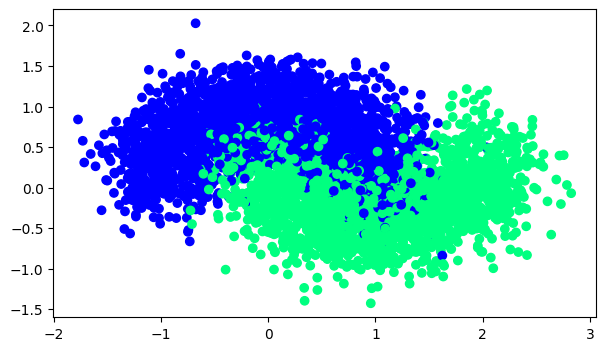

In [4]:
import matplotlib.pyplot as plt

N = 4000
x, t = datasets.make_moons(N, noise=0.3)

plt.figure(figsize=(7, 4))
plt.scatter(x[:, 0], x[:, 1], c=t, cmap=plt.cm.winter)

t = t.reshape(N, 1)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(x, t, test_size=0.2)

In [6]:
from sklearn.utils import shuffle
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
np.random.seed(123)
tf.random.set_seed(123)

Init Plugin
Init Graph Optimizer
Init Kernel


In [7]:
hidden_size = 10
output_dim = 1
EPOCHS = 100
batch_size = 100
learning_rate = 0.1

In [8]:
class Feed_Forward_Net(Model):
    def __init__(self, hidden_size, output_dim):
        super().__init__()
        self.l1 = Dense(hidden_size, activation='sigmoid')
        self.l2 = Dense(output_dim, activation='sigmoid')
        
    def call(self, x):
        h = self.l1(x)
        y = self.l2(h)
        
        return y

In [9]:
model = Feed_Forward_Net(hidden_size, output_dim)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-12-22 20:42:45.430811: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-22 20:42:45.431312: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
optimizer = optimizers.SGD(learning_rate=learning_rate)

In [11]:
criterion = losses.BinaryCrossentropy()

def compute_loss(t, y):
    return criterion(t, y)

In [13]:
def train_step(x, t):
    with tf.GradientTape() as tape:
        preds = model(x)
        loss = compute_loss(t, preds)
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    return loss


In [14]:
def test_step(x, t):
    preds = model(x)
    loss = compute_loss(t, preds)
    test_loss(loss)
    test_acc(t, preds)
    return loss

In [15]:
n_batches = X_train.shape[0] // batch_size

for epoch in range(EPOCHS):
    train_loss = 0.
    x_, t_ = shuffle(X_train, Y_train)
    
    for batch in range(n_batches):
        start = batch * batch_size
        end = start + batch_size
        loss = train_step(x_[start:end], t_[start:end])
        train_loss += loss.numpy()/n_batches
        
    print('Epoch: {}, Loss : {:.3}'.format(epoch+1, train_loss))
        

Epoch: 1, Loss : 0.623
Epoch: 2, Loss : 0.566
Epoch: 3, Loss : 0.52
Epoch: 4, Loss : 0.484
Epoch: 5, Loss : 0.456
Epoch: 6, Loss : 0.434
Epoch: 7, Loss : 0.417
Epoch: 8, Loss : 0.403
Epoch: 9, Loss : 0.393
Epoch: 10, Loss : 0.385
Epoch: 11, Loss : 0.378
Epoch: 12, Loss : 0.372
Epoch: 13, Loss : 0.367
Epoch: 14, Loss : 0.364
Epoch: 15, Loss : 0.36
Epoch: 16, Loss : 0.357
Epoch: 17, Loss : 0.355
Epoch: 18, Loss : 0.353
Epoch: 19, Loss : 0.351
Epoch: 20, Loss : 0.349
Epoch: 21, Loss : 0.348
Epoch: 22, Loss : 0.347
Epoch: 23, Loss : 0.346
Epoch: 24, Loss : 0.345
Epoch: 25, Loss : 0.345
Epoch: 26, Loss : 0.344
Epoch: 27, Loss : 0.343
Epoch: 28, Loss : 0.343
Epoch: 29, Loss : 0.343
Epoch: 30, Loss : 0.342
Epoch: 31, Loss : 0.342
Epoch: 32, Loss : 0.342
Epoch: 33, Loss : 0.342
Epoch: 34, Loss : 0.341
Epoch: 35, Loss : 0.341
Epoch: 36, Loss : 0.341
Epoch: 37, Loss : 0.341
Epoch: 38, Loss : 0.341
Epoch: 39, Loss : 0.341
Epoch: 40, Loss : 0.341
Epoch: 41, Loss : 0.341
Epoch: 42, Loss : 0.341
Epo

In [17]:
test_loss = metrics.Mean()
test_acc  = metrics.BinaryAccuracy()

test_step(X_test, Y_test)

print('test_loss: {:.3f}, test_acc: {:.3f}'.format(test_loss.result(), test_acc.result()))

test_loss: 0.332, test_acc: 0.859
